<a href="https://colab.research.google.com/github/Korniev/Machine-Learning-projects/blob/main/CV/number_recogn_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import os

# Перевірка файлу в Google Colab
file_path = '/content/drive/My Drive/Colab Notebooks/yolov5.zip'
print("File exists:", os.path.exists(file_path))

File exists: True


In [38]:
!unzip '/content/drive/My Drive/Colab Notebooks/yolov5.zip' -d /content/project

Archive:  /content/drive/My Drive/Colab Notebooks/yolov5.zip
replace /content/project/yolov5/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/project/yolov5/.DS_Store  
  inflating: /content/project/__MACOSX/yolov5/._.DS_Store  
  inflating: /content/project/yolov5/LICENSE  
  inflating: /content/project/yolov5/requirements.txt  
  inflating: /content/project/__MACOSX/yolov5/._requirements.txt  
  inflating: /content/project/yolov5/CITATION.cff  
  inflating: /content/project/yolov5/val.py  
  inflating: /content/project/yolov5/pyproject.toml  
  inflating: /content/project/yolov5/export.py  
  inflating: /content/project/yolov5/README.md  
  inflating: /content/project/yolov5/.dockerignore  
  inflating: /content/project/yolov5/yolov5s.pt  
  inflating: /content/project/yolov5/.gitignore  
  inflating: /content/project/yolov5/CONTRIBUTING.md  
  inflating: /content/project/yolov5/data.yaml  
  inflating: /content/project/yolov5/.gitattributes  
  inflating: /co

In [39]:
%cd /content/project
!ls


/content/project
__MACOSX  yolov5


In [40]:
%cd /content/project/yolov5/

/content/project/yolov5


In [41]:
!ls

benchmarks.py	 data	    hubconf.py	 pyproject.toml    runs		   utils
CITATION.cff	 data.yaml  LICENSE	 README.md	   segment	   val.py
classify	 detect.py  models	 README.zh-CN.md   train.py	   yolov5s.pt
CONTRIBUTING.md  export.py  __pycache__  requirements.txt  tutorial.ipynb


In [42]:
!pip install -r requirements.txt

In [43]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -q '/content/drive/My Drive/Colab Notebooks/dataset.zip' -d '/content/dataset'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
replace /content/dataset/dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [44]:
# Відкриття та вивід вмісту файлу data.yaml
with open('/content/project/yolov5/data.yaml', 'r') as file:
    data = file.read()
    print(data)


train: /Users/korniev/PycharmProjects/number_plate_recogn_yolo5/dataset/images/train
val: /Users/korniev/PycharmProjects/number_plate_recogn_yolo5/dataset/images/val

nc: 1  # number of classes
names: ['license_plate']  # class names


In [45]:
new_data_yaml_content = """
train: /content/dataset/dataset/images/train  # шлях до тренувальних зображень
val: /content/dataset/dataset/images/val    # шлях до зображень валідації

nc: 1  # кількість класів
names: ['license_plate']  # назви класів
"""

# Запис нового вмісту у файл
with open('/content/project/yolov5/data.yaml', 'w') as file:
    file.write(new_data_yaml_content)


In [46]:
# Відкриття та вивід вмісту файлу data.yaml
with open('/content/project/yolov5/data.yaml', 'r') as file:
    data = file.read()
    print(data)


train: /content/dataset/dataset/images/train  # шлях до тренувальних зображень
val: /content/dataset/dataset/images/val    # шлях до зображень валідації

nc: 1  # кількість класів
names: ['license_plate']  # назви класів



In [48]:
!python train.py --img 640 --batch 16 --epochs 40 --data data.yaml --weights yolov5s.pt


2024-05-04 19:04:55.229418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 19:04:55.229467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 19:04:55.230837: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optim

In [49]:
!sudo apt install tesseract-ocr
!pip install pytesseract



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,535 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [50]:
import pytesseract
from PIL import Image

In [54]:
!ls /content/project/yolov5/runs/train/exp9

confusion_matrix.png				     P_curve.png       train_batch2.jpg
events.out.tfevents.1714849497.f2f43ca16606.19111.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					     R_curve.png       val_batch0_pred.jpg
hyp.yaml					     results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				     results.png       val_batch1_pred.jpg
labels.jpg					     train_batch0.jpg  weights
opt.yaml					     train_batch1.jpg


In [55]:
import matplotlib.pyplot as plt

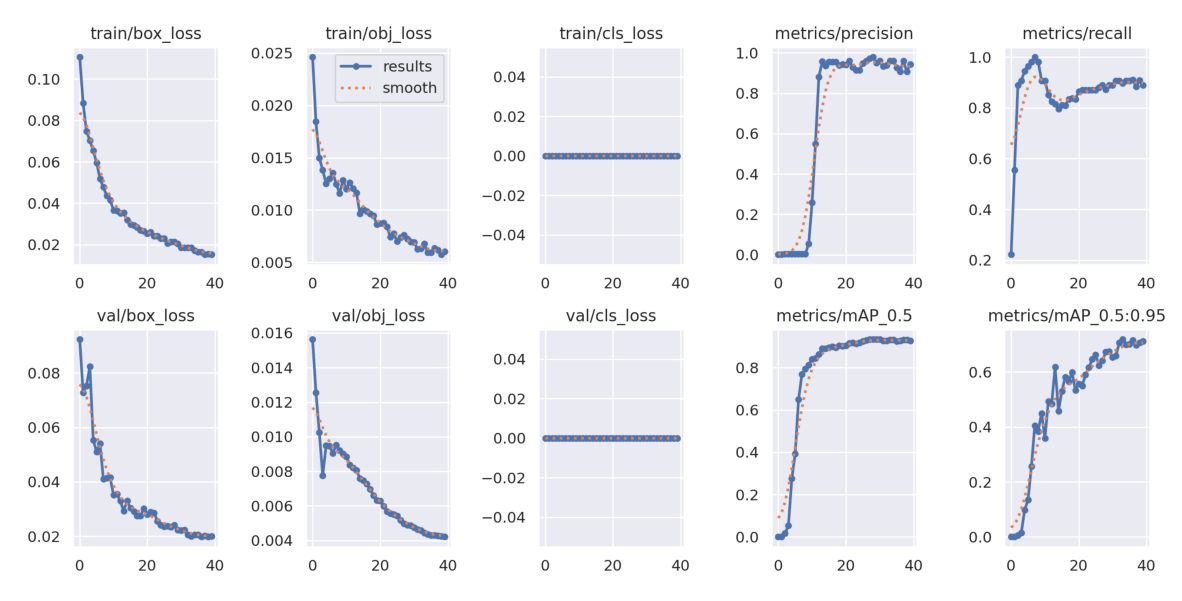

In [56]:
# Читаем файл с графиками процесса обучения
results = plt.imread('/content/project/yolov5/runs/train/exp9/results.png')
# Отображаем графики
fig, ax = plt.subplots(figsize=(15,12))
ax.axis('off')
ax.imshow(results);

In [57]:
!ls /content/project/yolov5/runs/train/exp9/weights

best.pt  last.pt
